## 1. Import Libraries

In [1]:
import numpy as np

import pandas as pd

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
	OneHotEncoder,
	OrdinalEncoder,
	StandardScaler,
	MinMaxScaler,
	PowerTransformer,
	FunctionTransformer
)

from feature_engine.outliers import Winsorizer
from feature_engine.datetime import DatetimeFeatures
from feature_engine.selection import SelectBySingleFeaturePerformance
from feature_engine.encoding import (
	RareLabelEncoder,
	MeanEncoder,
	CountFrequencyEncoder
)

import matplotlib.pyplot as plt

import warnings

c:\Users\Hp\.conda\envs\ml_env\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 2. Display Settings

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
sklearn.set_config(transform_output="pandas")

In [4]:
warnings.filterwarnings("ignore")

## 3. Read the Data

In [5]:
import pandas as pd

path = r"E:\flight price prediction using sagemaker\dataset\train.csv"
train = pd.read_csv(path)

# Display basic information about the DataFrame
print(train.info())

# Display the first few rows of the DataFrame
print(train.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          640 non-null    object 
 1   source           640 non-null    object 
 2   destination      640 non-null    object 
 3   dep_time         640 non-null    object 
 4   arrival_time     640 non-null    object 
 5   duration         640 non-null    int64  
 6   total_stops      640 non-null    float64
 7   additional_info  640 non-null    object 
 8   date_of_Journey  640 non-null    object 
 9   price            640 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 50.1+ KB
None
             airline    source destination  dep_time arrival_time  duration  \
0        Jet Airways     Delhi      Cochin  14:35:00     12:35:00      1320   
1           Spicejet  Banglore   New Delhi  10:20:00     18:15:00       475   
2             Indigo  Banglore   New D

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          640 non-null    object 
 1   source           640 non-null    object 
 2   destination      640 non-null    object 
 3   dep_time         640 non-null    object 
 4   arrival_time     640 non-null    object 
 5   duration         640 non-null    int64  
 6   total_stops      640 non-null    float64
 7   additional_info  640 non-null    object 
 8   date_of_Journey  640 non-null    object 
 9   price            640 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 50.1+ KB


In [7]:
X_train = train.drop(columns="price")
y_train = train.price.copy()

## 4. Transformation Operations

### 4.1 airline

In [8]:
X_train.airline

0            Jet Airways
1               Spicejet
2                 Indigo
3      Multiple Carriers
4                Vistara
             ...        
635    Multiple Carriers
636               Indigo
637               Indigo
638          Jet Airways
639               Indigo
Name: airline, Length: 640, dtype: object

In [9]:
air_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="most_frequent")),
	("grouper", RareLabelEncoder(tol=0.1, replace_with="Other", n_categories=2)),
	("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

air_transformer.fit_transform(X_train.loc[:, ["airline"]])#.airline.value_counts()

,airline_Air India,airline_Indigo,airline_Jet Airways,airline_Multiple Carriers,airline_Other
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
635,0.0,0.0,0.0,1.0,0.0
636,0.0,1.0,0.0,0.0,0.0
637,0.0,1.0,0.0,0.0,0.0
638,0.0,0.0,1.0,0.0,0.0


In [10]:
X_train.date_of_Journey

0      2019-06-15
1      2019-03-09
2      2019-03-03
3      2019-05-21
4      2019-04-06
          ...    
635    2019-05-15
636    2019-05-09
637    2019-04-27
638    2019-05-01
639    2019-06-01
Name: date_of_Journey, Length: 640, dtype: object

In [16]:
feature_to_extract = ["month", "week", "day_of_week", "day_of_year"]

doj_transformer = Pipeline(steps=[
	("dt", DatetimeFeatures(features_to_extract=feature_to_extract, yearfirst=True, format="mixed")),
	("scaler", MinMaxScaler())
])

doj_transformer.fit_transform(X_train.loc[:, ["date_of_Journey"]])

,date_of_Journey_month,date_of_Journey_week,date_of_Journey_day_of_week,date_of_Journey_day_of_year
0,1.000000,0.882353,0.833333,0.898305
1,0.000000,0.058824,0.833333,0.067797
2,0.000000,0.000000,1.000000,0.016949
3,0.666667,0.705882,0.166667,0.686441
4,0.333333,0.294118,0.833333,0.305085
...,...,...,...,...
635,0.666667,0.647059,0.333333,0.635593
636,0.666667,0.588235,0.500000,0.584746
637,0.333333,0.470588,0.833333,0.483051
638,0.666667,0.529412,0.333333,0.516949


In [ ]:
X_train.source

0         Delhi
1      Banglore
2      Banglore
3         Delhi
4      Banglore
         ...   
635       Delhi
636      Mumbai
637    Banglore
638     Kolkata
639    Banglore
Name: source, Length: 640, dtype: object

In [ ]:
X_train.destination

0         Cochin
1      New Delhi
2      New Delhi
3         Cochin
4          Delhi
         ...    
635       Cochin
636    Hyderabad
637        Delhi
638     Banglore
639        Delhi
Name: destination, Length: 640, dtype: object

In [17]:
location_subset = X_train.loc[:, ["source", "destination"]]
location_subset

,source,destination
0,Delhi,Cochin
1,Banglore,New Delhi
2,Banglore,New Delhi
3,Delhi,Cochin
4,Banglore,Delhi
...,...,...
635,Delhi,Cochin
636,Mumbai,Hyderabad
637,Banglore,Delhi
638,Kolkata,Banglore


In [18]:
location_pipe1 = Pipeline(steps=[
	("grouper", RareLabelEncoder(tol=0.1, replace_with="Other", n_categories=2)),
	("encoder", MeanEncoder()),
	("scaler", PowerTransformer())
])

location_pipe1.fit_transform(location_subset, y_train)

,source,destination
0,0.997905,0.998859
1,-1.245774,-1.084051
2,-1.245774,-1.084051
3,0.997905,0.998859
4,-1.245774,-1.799110
...,...,...
635,0.997905,0.998859
636,-1.740846,-1.084051
637,-1.245774,-1.799110
638,-0.148607,-0.179609


In [19]:
np.union1d(
	X_train.source.unique(),
	X_train.destination.unique()
)

array(['Banglore', 'Chennai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'Mumbai', 'New Delhi'], dtype=object)

In [20]:
def is_north(X):
	columns = X.columns.to_list()
	north_cities = ["Delhi", "Kolkata", "Mumbai", "New Delhi"]
	return (
		X
		.assign(**{
			f"{col}_is_north": X.loc[:, col].isin(north_cities).astype(int)
			for col in columns
		})
		.drop(columns=columns)
	)


FunctionTransformer(func=is_north).fit_transform(location_subset)

,source_is_north,destination_is_north
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
635,1,0
636,1,0
637,0,1
638,1,0


In [21]:
location_transformer = FeatureUnion(transformer_list=[
	("part1", location_pipe1),
	("part2", FunctionTransformer(func=is_north))
])

location_transformer.fit_transform(location_subset, y_train)

,source,destination,source_is_north,destination_is_north
0,0.997905,0.998859,1,0
1,-1.245774,-1.084051,0,1
2,-1.245774,-1.084051,0,1
3,0.997905,0.998859,1,0
4,-1.245774,-1.799110,0,1
...,...,...,...,...
635,0.997905,0.998859,1,0
636,-1.740846,-1.084051,1,0
637,-1.245774,-1.799110,0,1
638,-0.148607,-0.179609,1,0


### 4.4 dep_time & arrival_time

In [22]:
X_train.dep_time

0      14:35:00
1      10:20:00
2      20:00:00
3      04:55:00
4      19:30:00
         ...   
635    14:00:00
636    12:00:00
637    23:30:00
638    21:10:00
639    04:00:00
Name: dep_time, Length: 640, dtype: object

In [23]:
X_train.arrival_time

0      12:35:00
1      18:15:00
2      22:55:00
3      19:15:00
4      22:15:00
         ...   
635    01:30:00
636    13:30:00
637    02:20:00
638    08:15:00
639    06:50:00
Name: arrival_time, Length: 640, dtype: object

In [24]:
time_subset = X_train.loc[:, ["dep_time", "arrival_time"]]
time_subset

,dep_time,arrival_time
0,14:35:00,12:35:00
1,10:20:00,18:15:00
2,20:00:00,22:55:00
3,04:55:00,19:15:00
4,19:30:00,22:15:00
...,...,...
635,14:00:00,01:30:00
636,12:00:00,13:30:00
637,23:30:00,02:20:00
638,21:10:00,08:15:00


In [25]:
time_pipe1 = Pipeline(steps=[
	("dt", DatetimeFeatures(features_to_extract=["hour", "minute"])),
	("scaler", MinMaxScaler())
])

time_pipe1.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute
0,0.608696,0.636364,0.521739,0.636364
1,0.434783,0.363636,0.782609,0.272727
2,0.869565,0.000000,0.956522,1.000000
3,0.173913,1.000000,0.826087,0.272727
4,0.826087,0.545455,0.956522,0.272727
...,...,...,...,...
635,0.608696,0.000000,0.043478,0.545455
636,0.521739,0.000000,0.565217,0.545455
637,1.000000,0.545455,0.086957,0.363636
638,0.913043,0.181818,0.347826,0.272727


In [26]:
def part_of_day(X, morning=4, noon=12, eve=16, night=20):
	columns = X.columns.to_list()
	X_temp = X.assign(**{
		col: pd.to_datetime(X.loc[:, col]).dt.hour
		for col in columns
	})

	return (
		X_temp
		.assign(**{
			f"{col}_part_of_day": np.select(
				[X_temp.loc[:, col].between(morning, noon, inclusive="left"),
				 X_temp.loc[:, col].between(noon, eve, inclusive="left"),
				 X_temp.loc[:, col].between(eve, night, inclusive="left")],
				["morning", "afternoon", "evening"],
				default="night"
			)
			for col in columns
		})
		.drop(columns=columns)
	)

FunctionTransformer(func=part_of_day).fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,afternoon,afternoon
1,morning,evening
2,night,night
3,morning,evening
4,evening,night
...,...,...
635,afternoon,night
636,afternoon,afternoon
637,night,night
638,night,morning


In [27]:
time_pipe2 = Pipeline(steps=[
	("part", FunctionTransformer(func=part_of_day)),
	("encoder", CountFrequencyEncoder()),
	("scaler", MinMaxScaler())
])

time_pipe2.fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,0.000000,0.000000
1,1.000000,0.587629
2,0.211712,0.969072
3,1.000000,0.587629
4,0.175676,0.969072
...,...,...
635,0.000000,0.969072
636,0.000000,0.000000
637,0.211712,0.969072
638,0.211712,1.000000


In [28]:
time_transformer = FeatureUnion(transformer_list=[
	("part1", time_pipe1),
	("part2", time_pipe2)
])

time_transformer.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute,dep_time_part_of_day,arrival_time_part_of_day
0,0.608696,0.636364,0.521739,0.636364,0.000000,0.000000
1,0.434783,0.363636,0.782609,0.272727,1.000000,0.587629
2,0.869565,0.000000,0.956522,1.000000,0.211712,0.969072
3,0.173913,1.000000,0.826087,0.272727,1.000000,0.587629
4,0.826087,0.545455,0.956522,0.272727,0.175676,0.969072
...,...,...,...,...,...,...
635,0.608696,0.000000,0.043478,0.545455,0.000000,0.969072
636,0.521739,0.000000,0.565217,0.545455,0.000000,0.000000
637,1.000000,0.545455,0.086957,0.363636,0.211712,0.969072
638,0.913043,0.181818,0.347826,0.272727,0.211712,1.000000


### 4.5 duration

In [29]:
X_train.duration

0      1320
1       475
2       175
3       860
4       165
       ... 
635     690
636      90
637     170
638     665
639     170
Name: duration, Length: 640, dtype: int64

In [30]:
(
	X_train
	.duration
	.quantile([0.25, 0.5, 0.75])
	.values
	.reshape(-1, 1)
	# .shape
)

array([[175.],
       [515.],
       [865.]])

In [31]:
class RBFPercentileSimilarity(BaseEstimator, TransformerMixin):
	def __init__(self, variables=None, percentiles=[0.25, 0.5, 0.75], gamma=0.1):
		self.variables = variables
		self.percentiles = percentiles
		self.gamma = gamma


	def fit(self, X, y=None):
		if not self.variables:
			self.variables = X.select_dtypes(include="number").columns.to_list()

		self.reference_values_ = {
			col: (
				X
				.loc[:, col]
				.quantile(self.percentiles)
				.values
				.reshape(-1, 1)
			)
			for col in self.variables
		}

		return self


	def transform(self, X):
		objects = []
		for col in self.variables:
			columns = [f"{col}_rbf_{int(percentile * 100)}" for percentile in self.percentiles]
			obj = pd.DataFrame(
				data=rbf_kernel(X.loc[:, [col]], Y=self.reference_values_[col], gamma=self.gamma),
				columns=columns
			)
			objects.append(obj)
		return pd.concat(objects, axis=1)

In [32]:
RBFPercentileSimilarity(percentiles=[0.4, 0.8]).fit_transform(X_train)

,duration_rbf_40,duration_rbf_80,total_stops_rbf_40,total_stops_rbf_80
0,0.0,0.0,0.904837,0.904837
1,0.0,0.0,1.000000,1.000000
2,0.0,0.0,0.904837,0.904837
3,0.0,0.0,1.000000,1.000000
4,0.0,0.0,0.904837,0.904837
...,...,...,...,...
635,0.0,0.0,1.000000,1.000000
636,0.0,0.0,0.904837,0.904837
637,0.0,0.0,0.904837,0.904837
638,0.0,0.0,1.000000,1.000000


In [33]:
def duration_category(X, short=180, med=400):
	return (
		X
		.assign(duration_cat=np.select([X.duration.lt(short),
									    X.duration.between(short, med, inclusive="left")],
									   ["short", "medium"],
									   default="long"))
		.drop(columns="duration")
	)

In [34]:
def is_over(X, value=1000):
	return (
		X
		.assign(**{
			f"duration_over_{value}": X.duration.ge(value).astype(int)
		})
		.drop(columns="duration")
	)

In [35]:
duration_pipe1 = Pipeline(steps=[
	("rbf", RBFPercentileSimilarity()),
	("scaler", PowerTransformer())
])

duration_pipe2 = Pipeline(steps=[
	("cat", FunctionTransformer(func=duration_category)),
	("encoder", OrdinalEncoder(categories=[["short", "medium", "long"]]))
])

duration_union = FeatureUnion(transformer_list=[
	("part1", duration_pipe1),
	("part2", duration_pipe2),
	("part3", FunctionTransformer(func=is_over)),
	("part4", StandardScaler())
])

duration_transformer = Pipeline(steps=[
	("outliers", Winsorizer(capping_method="iqr", fold=1.5)),
	("imputer", SimpleImputer(strategy="median")),
	("union", duration_union)
])

duration_transformer.fit_transform(X_train.loc[:, ["duration"]])

,duration_rbf_25,duration_rbf_50,duration_rbf_75,duration_cat,duration_over_1000,duration
0,-0.347584,-0.132242,-0.126371,2.0,1,1.486415
1,-0.347584,-0.132242,-0.126371,2.0,0,-0.304722
2,3.059496,-0.132242,-0.126371,0.0,0,-0.940628
3,-0.347584,-0.132242,7.937155,2.0,0,0.511358
4,-0.342465,-0.132242,-0.126371,0.0,0,-0.961825
...,...,...,...,...,...,...
635,-0.347584,-0.132242,-0.126371,2.0,0,0.151011
636,-0.347584,-0.132242,-0.126371,0.0,0,-1.120802
637,2.809646,-0.132242,-0.126371,0.0,0,-0.951227
638,-0.347584,-0.132242,-0.126371,2.0,0,0.098019


### 4.6 total_stops

In [36]:
X_train.total_stops

0      2.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
635    1.0
636    0.0
637    0.0
638    1.0
639    0.0
Name: total_stops, Length: 640, dtype: float64

In [37]:
def is_direct(X):
	return X.assign(is_direct_flight=X.total_stops.eq(0).astype(int))


total_stops_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="most_frequent")),
	("", FunctionTransformer(func=is_direct))
])

total_stops_transformer.fit_transform(X_train.loc[:, ["total_stops"]])

,total_stops,is_direct_flight
0,2.0,0
1,1.0,0
2,0.0,1
3,1.0,0
4,0.0,1
...,...,...
635,1.0,0
636,0.0,1
637,0.0,1
638,1.0,0


### 4.7 additional_info

In [38]:
X_train.additional_info

0      In-flight meal not included
1                          No Info
2                          No Info
3                          No Info
4                          No Info
                  ...             
635                        No Info
636                        No Info
637                        No Info
638                        No Info
639                        No Info
Name: additional_info, Length: 640, dtype: object

In [39]:
info_pipe1 = Pipeline(steps=[
	("group", RareLabelEncoder(tol=0.1, n_categories=2, replace_with="Other")),
	("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

info_pipe1.fit_transform(X_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Other
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
635,0.0,1.0,0.0
636,0.0,1.0,0.0
637,0.0,1.0,0.0
638,0.0,1.0,0.0


In [40]:

def have_info(X):
	return X.assign(additional_info=X.additional_info.ne("No Info").astype(int))

In [41]:
info_union = FeatureUnion(transformer_list=[
	("part1", info_pipe1),
	("part2", FunctionTransformer(func=have_info))
])

In [42]:
info_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="constant", fill_value="unknown")),
	("union", info_union)
])

info_transformer.fit_transform(X_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Other,additional_info
0,1.0,0.0,0.0,1
1,0.0,1.0,0.0,0
2,0.0,1.0,0.0,0
3,0.0,1.0,0.0,0
4,0.0,1.0,0.0,0
...,...,...,...,...
635,0.0,1.0,0.0,0
636,0.0,1.0,0.0,0
637,0.0,1.0,0.0,0
638,0.0,1.0,0.0,0


### 4.8 Column Transformer

In [44]:
column_transformer = ColumnTransformer(transformers=[
	("air", air_transformer, ["airline"]),
	("doj", doj_transformer, ["date_of_Journey"]),
	("location", location_transformer, ["source", 'destination']),
	("time", time_transformer, ["dep_time", "arrival_time"]),
	("dur", duration_transformer, ["duration"]),
	("stops", total_stops_transformer, ["total_stops"]),
	("info", info_transformer, ["additional_info"])
], remainder="passthrough")

column_transformer.fit_transform(X_train, y_train)

,air__airline_Air India,air__airline_Indigo,air__airline_Jet Airways,air__airline_Multiple Carriers,air__airline_Other,doj__date_of_Journey_month,doj__date_of_Journey_week,doj__date_of_Journey_day_of_week,doj__date_of_Journey_day_of_year,location__source,location__destination,location__source_is_north,location__destination_is_north,time__dep_time_hour,time__dep_time_minute,time__arrival_time_hour,time__arrival_time_minute,time__dep_time_part_of_day,time__arrival_time_part_of_day,dur__duration_rbf_25,dur__duration_rbf_50,dur__duration_rbf_75,dur__duration_cat,dur__duration_over_1000,dur__duration,stops__total_stops,stops__is_direct_flight,info__additional_info_In-flight meal not included,info__additional_info_No Info,info__additional_info_Other,info__additional_info
0,0.0,0.0,1.0,0.0,0.0,1.000000,0.882353,0.833333,0.898305,0.997905,0.998859,1,0,0.608696,0.636364,0.521739,0.636364,0.000000,0.000000,-0.347584,-0.132242,-0.126371,2.0,1,1.486415,2.0,0,1.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,1.0,0.000000,0.058824,0.833333,0.067797,-1.245774,-1.084051,0,1,0.434783,0.363636,0.782609,0.272727,1.000000,0.587629,-0.347584,-0.132242,-0.126371,2.0,0,-0.304722,1.0,0,0.0,1.0,0.0,0
2,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.016949,-1.245774,-1.084051,0,1,0.869565,0.000000,0.956522,1.000000,0.211712,0.969072,3.059496,-0.132242,-0.126371,0.0,0,-0.940628,0.0,1,0.0,1.0,0.0,0
3,0.0,0.0,0.0,1.0,0.0,0.666667,0.705882,0.166667,0.686441,0.997905,0.998859,1,0,0.173913,1.000000,0.826087,0.272727,1.000000,0.587629,-0.347584,-0.132242,7.937155,2.0,0,0.511358,1.0,0,0.0,1.0,0.0,0
4,0.0,0.0,0.0,0.0,1.0,0.333333,0.294118,0.833333,0.305085,-1.245774,-1.799110,0,1,0.826087,0.545455,0.956522,0.272727,0.175676,0.969072,-0.342465,-0.132242,-0.126371,0.0,0,-0.961825,0.0,1,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,0.0,0.0,1.0,0.0,0.666667,0.647059,0.333333,0.635593,0.997905,0.998859,1,0,0.608696,0.000000,0.043478,0.545455,0.000000,0.969072,-0.347584,-0.132242,-0.126371,2.0,0,0.151011,1.0,0,0.0,1.0,0.0,0
636,0.0,1.0,0.0,0.0,0.0,0.666667,0.588235,0.500000,0.584746,-1.740846,-1.084051,1,0,0.521739,0.000000,0.565217,0.545455,0.000000,0.000000,-0.347584,-0.132242,-0.126371,0.0,0,-1.120802,0.0,1,0.0,1.0,0.0,0
637,0.0,1.0,0.0,0.0,0.0,0.333333,0.470588,0.833333,0.483051,-1.245774,-1.799110,0,1,1.000000,0.545455,0.086957,0.363636,0.211712,0.969072,2.809646,-0.132242,-0.126371,0.0,0,-0.951227,0.0,1,0.0,1.0,0.0,0
638,0.0,0.0,1.0,0.0,0.0,0.666667,0.529412,0.333333,0.516949,-0.148607,-0.179609,1,0,0.913043,0.181818,0.347826,0.272727,0.211712,1.000000,-0.347584,-0.132242,-0.126371,2.0,0,0.098019,1.0,0,0.0,1.0,0.0,0


## 5. Feature Selection

In [45]:
estimator = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)

selector = SelectBySingleFeaturePerformance(
	estimator=estimator,
	scoring="r2",
	threshold=0.1
)

## 6. Putting it all Together

In [46]:
preprocessor = Pipeline(steps=[
	("ct", column_transformer),
	("selector", selector)
])

preprocessor.fit_transform(X_train, y_train)

,air__airline_Indigo,air__airline_Jet Airways,air__airline_Other,doj__date_of_Journey_day_of_year,location__source,location__destination,dur__duration_cat,dur__duration_over_1000,dur__duration,stops__total_stops,stops__is_direct_flight
0,0.0,1.0,0.0,0.898305,0.997905,0.998859,2.0,1,1.486415,2.0,0
1,0.0,0.0,1.0,0.067797,-1.245774,-1.084051,2.0,0,-0.304722,1.0,0
2,1.0,0.0,0.0,0.016949,-1.245774,-1.084051,0.0,0,-0.940628,0.0,1
3,0.0,0.0,0.0,0.686441,0.997905,0.998859,2.0,0,0.511358,1.0,0
4,0.0,0.0,1.0,0.305085,-1.245774,-1.799110,0.0,0,-0.961825,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,0.0,0.0,0.635593,0.997905,0.998859,2.0,0,0.151011,1.0,0
636,1.0,0.0,0.0,0.584746,-1.740846,-1.084051,0.0,0,-1.120802,0.0,1
637,1.0,0.0,0.0,0.483051,-1.245774,-1.799110,0.0,0,-0.951227,0.0,1
638,0.0,1.0,0.0,0.516949,-0.148607,-0.179609,2.0,0,0.098019,1.0,0


## 7. Visualizations

In [47]:
feature_performances = preprocessor.named_steps["selector"].feature_performance_
feature_performances

{'air__airline_Air India': -0.004884061787377288,
 'air__airline_Indigo': 0.13180032308807058,
 'air__airline_Jet Airways': 0.1815270313669878,
 'air__airline_Multiple Carriers': -0.004217460882264305,
 'air__airline_Other': 0.10009061710468144,
 'doj__date_of_Journey_month': 0.06251217142222514,
 'doj__date_of_Journey_week': 0.07934111749236128,
 'doj__date_of_Journey_day_of_week': -0.02029015307017971,
 'doj__date_of_Journey_day_of_year': 0.11701538540443475,
 'location__source': 0.11009918196792572,
 'location__destination': 0.11752914218315624,
 'location__source_is_north': 0.05330689420104969,
 'location__destination_is_north': 0.05330689420104969,
 'time__dep_time_hour': -0.029587168886313926,
 'time__dep_time_minute': -0.00035618808400820584,
 'time__arrival_time_hour': 0.07659436086518856,
 'time__arrival_time_minute': 0.06516321834308707,
 'time__dep_time_part_of_day': -0.028626166502051225,
 'time__arrival_time_part_of_day': 0.035245646615901904,
 'dur__duration_rbf_25': 0.08

In [48]:
sorted_feat_imp = dict(sorted(feature_performances.items(), key=lambda val: val[1]))
sorted_feat_imp

{'time__dep_time_hour': -0.029587168886313926,
 'time__dep_time_part_of_day': -0.028626166502051225,
 'doj__date_of_Journey_day_of_week': -0.02029015307017971,
 'dur__duration_rbf_75': -0.014240816054179076,
 'info__additional_info_No Info': -0.013917857913183637,
 'info__additional_info': -0.013917857913183637,
 'air__airline_Air India': -0.004884061787377288,
 'air__airline_Multiple Carriers': -0.004217460882264305,
 'info__additional_info_In-flight meal not included': -0.0032312513498200892,
 'time__dep_time_minute': -0.00035618808400820584,
 'dur__duration_rbf_50': 0.0038682751678978575,
 'info__additional_info_Other': 0.02724835131301299,
 'time__arrival_time_part_of_day': 0.035245646615901904,
 'location__source_is_north': 0.05330689420104969,
 'location__destination_is_north': 0.05330689420104969,
 'doj__date_of_Journey_month': 0.06251217142222514,
 'time__arrival_time_minute': 0.06516321834308707,
 'time__arrival_time_hour': 0.07659436086518856,
 'doj__date_of_Journey_week': 0.

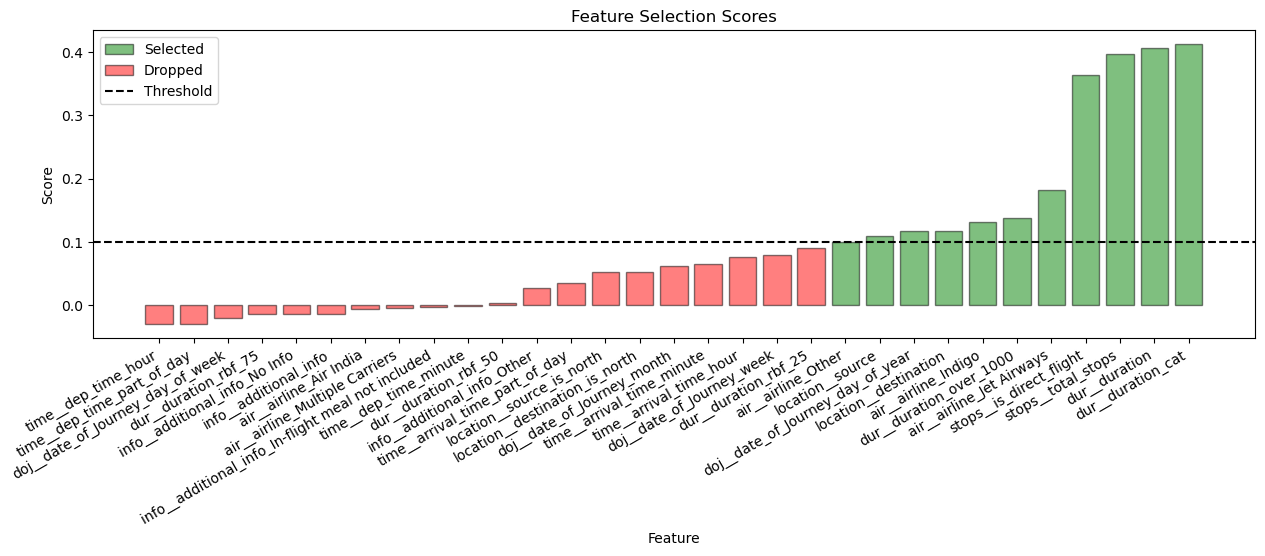

In [49]:
THRESHOLD = 0.1

selected_bar = None
dropped_bar = None
colors = ["red" if score < THRESHOLD else "green" for score in sorted_feat_imp.values()]


fig, ax = plt.subplots(figsize=(15, 4)) 

for i, (feature, score) in enumerate(sorted_feat_imp.items()):
	params = dict(
		x=i,
		height=score,
		edgecolor="black",
		alpha=0.5
	)
	
	if score < THRESHOLD:
		bar = ax.bar(
			color="red",
			**params
		)
		if not dropped_bar:
			dropped_bar = bar[0]
	else:
		bar = ax.bar(
			color="green",
			**params
		)
		if not selected_bar:
			selected_bar = bar[0]

thresh_line = ax.axhline(
	y=0.1,
	color="black",
	linestyle="--"
)

ax.set_xticks(
	ticks=range(len(sorted_feat_imp)),
	labels=list(sorted_feat_imp.keys()),
	rotation=30,
	ha="right"
)

ax.set(
	xlabel="Feature",
	ylabel="Score",
	title="Feature Selection Scores"
)

ax.legend(
	handles=[selected_bar, dropped_bar, thresh_line],
	labels=["Selected", "Dropped", "Threshold"],
	loc="upper left"
)

plt.show()